# Домашнее задание 1

1. Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.

Показатель **Recall** отражает способность выбранного метода классификации отобрать все интересующие нас наблюдения из общей совокупности, а показатель **Precision** в свою очередь отражает насколько точно этот отбор был произведен, то есть сколько из отобранных наблюдений действительно принадлежит к искомому классу.
Значимость показателей во многом зависит от конкретней ситуации. Например, представим, что перед нами стоит задача определения писем, которые являются спамом. В таких условиях не очень страшно, если какое-то спам-письмо попадет в почту (*False Negative*). Намного хуже ситуация, если какое-то важное письмо будет помечено как спам (*False Positive*). Поэтому в такой задаче необходимо максимизировать показатель **Precision**. Аналогичным образом обстоит ситуация, когда мы хотим порекомендовать пользователю видео, которые ему будут интересны. Если какое-то потенциально интересное ему видео не попадет в нашу подборку (*False Negative*), с большой долей вероятности это не приведет к каким-то значимым последствиям. Хуже ситуация, когда мы порекомендуем пользователю видео, которое ему на самом деле неинтересно (*False Positive*). Он может покинуть наш сайт, а если такие случаи будут повторяться, то даже прекратить пользоваться нашим сервисом. 
В ряде ситуаций наоборот важнее максимизировать значение показателя **Recall**. Например, если мы производим отбор детей в спортивную школу, то ничего страшного, если мы отберем ребенка, который не станет звездным футболистом в будущем (*False Positive*). Намного хуже, если мы не отберем того, у которого на самом деле отличные перспективы (*False Negative*). Подобным образом обстоит дело, если мы предсказываем будет ли сегодня землетрясение. Главной задачей является минимизация ситуаций, когда было дано предсказание, что землетрясение не будет, а оно на самом деле произошло (*False Negative*). 

2. Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

Во-первых, эта мера больше наказывает в случае сильно отклоняющихся значений. Если какой-то из показателей равен 1, а другой равен 0, то простое среднее даст значение 0.5, а **F1** будет равен нулю. Во-вторых, так как знаменатели в формулах для расчета **Precision** и **Recall**  различаются, то интерпретация показателя равного их полусумме будет затруднительна.

3. Реализовать функции для подсчета Accuracy, Precision, Recall, F-score, которые на вход принимают y_true (истинные значения), y_pred (предсказанные значения), а на выход дается метрика.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
def accuracy(y_true, y_pred):
    if isinstance(y_true, (str, int, float, bool, dict)) or isinstance(y_pred, (str, int, float, bool, dict)):
        return f'Истинные и предсказанные значения должны быть представлены массивами данных'
    elif len(y_true) != len(y_pred):
        return f'Массивы значений имеют разную длину'
    else:
        true_objects = 0
        for i in range(len(y_pred)):
            if y_true[i] == y_pred[i]:
                true_objects+=1
        return f'Показатель Accuracy составляет {true_objects/len(y_pred)}.'

In [3]:
def precision(y_true, y_pred):
    if isinstance(y_true, (str, int, float, bool, dict)) or isinstance(y_pred, (str, int, float, bool, dict)):
        return f'Истинные и предсказанные значения должны быть представлены массивами данных'
    elif len(y_true) != len(y_pred):
        return f'Массивы значений имеют разную длину'
    else:
        precision_summary = ''
        for value in set(y_true):
            tp = 0
            fp = 0
            for i in range(len(y_pred)):
                if y_true[i] == y_pred[i] == value:
                    tp+=1
            precision_summary += f'Показатель Precision для класса {value} составляет {tp/y_pred.count(value)}.\n'
        return precision_summary

In [4]:
def recall(y_true, y_pred):
    if isinstance(y_true, (str, int, float, bool, dict)) or isinstance(y_pred, (str, int, float, bool, dict)):
        return f'Истинные и предсказанные значения должны быть представлены массивами данных'
    elif len(y_true) != len(y_pred):
        return f'Массивы значений имеют разную длину'
    else:
        precision_summary = ''
        for value in set(y_true):
            tp = 0
            fp = 0
            for i in range(len(y_pred)):
                if y_true[i] == y_pred[i] == value:
                    tp+=1
            precision_summary += f'Показатель Recall для класса {value} составляет {tp/y_true.count(value)}.\n'
        return precision_summary

In [5]:
def fscore(y_true, y_pred, beta):
    if isinstance(y_true, (str, int, float, bool, dict)) or isinstance(y_pred, (str, int, float, bool, dict)):
        return f'Истинные и предсказанные значения должны быть представлены массивами данных'
    elif len(y_true) != len(y_pred):
        return f'Массивы значений имеют разную длину'
    else:
        fscore_summary = f'Коэффициент бета = {beta}:\n'
        for value in set(y_true):
            tp = 0
            fp = 0
            for i in range(len(y_pred)):
                if y_true[i] == y_pred[i] == value:
                    tp+=1
            rc = tp/y_true.count(value)
            pr = tp/y_pred.count(value)
            fb = (1+beta**2) * pr * rc / (rc + pr * (beta**2))
            fscore_summary += f'Показатель F-score для класса {value} составляет {fb}.\n'
        return fscore_summary

In [6]:
true = [0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0]
pred = [0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1]

In [7]:
print(accuracy(true, pred))

Показатель Accuracy составляет 0.3333333333333333.


In [8]:
accuracy_score(true, pred)

0.3333333333333333

In [9]:
print(precision(true, pred))

Показатель Precision для класса 0 составляет 0.5.
Показатель Precision для класса 1 составляет 0.16666666666666666.
Показатель Precision для класса 2 составляет 0.5.



In [10]:
precision_score(true, pred, average=None)

array([0.5       , 0.16666667, 0.5       ])

In [11]:
print(recall(true, pred))

Показатель Recall для класса 0 составляет 0.4.
Показатель Recall для класса 1 составляет 0.25.
Показатель Recall для класса 2 составляет 0.3333333333333333.



In [12]:
recall_score(true, pred, average=None)

array([0.4       , 0.25      , 0.33333333])

In [13]:
print(fscore(true, pred, 1))

Коэффициент бета = 1:
Показатель F-score для класса 0 составляет 0.4444444444444445.
Показатель F-score для класса 1 составляет 0.2.
Показатель F-score для класса 2 составляет 0.4.



In [14]:
f1_score(true, pred, average=None)

array([0.44444444, 0.2       , 0.4       ])

### Дополнительное задание для работы с курсовым проектом

Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

In [15]:
df = pd.read_csv('train_crime.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


1. Построить график распределения целевой переменной. Сделать выводы.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


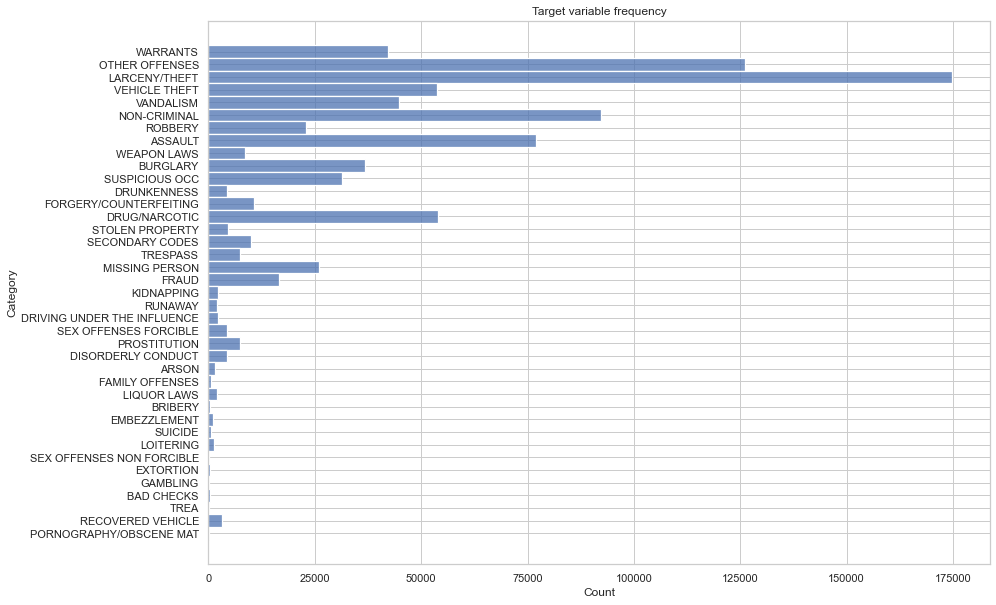

In [17]:
plt.figure(figsize=(14, 10))
sns.set(style='whitegrid')
sns.histplot(data=df, y='Category')
plt.title('Target variable frequency')
plt.show()

In [18]:
df['Category'].nunique()

39

In [19]:
df['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

Видно, что целевая переменная принимает 39 уникальных значений. Чаще всего встречаются следующие:
- LARCENY/THEFT;
- OTHER OFFENSES;
- NON-CRIMINAL.

2. Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.
3. Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.

В рассматриваемом наборе данных только переменные отвечающие за координаты __X__ и __Y__ являются количественными.

In [20]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


Значение широты равное _90_ может считаться выбросом, так как датасет содержит информацию о преступлениях в Сан-Франциско.

В переменной __Dates__ хранится отметка о времени преступления. По умолчанию она хранится в форме строки, преобразуем ее в дату для удобства работы в дальнейшем.

In [21]:
df['Dates']= pd.to_datetime(df['Dates'], format='%Y-%m-%d %H:%M:%S')

Посмотрим теперь, например, разбивку данных по годам.

In [22]:
df['Dates'].dt.year.value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: Dates, dtype: int64

Видим, что больше всего преступлений было зафиксировано в 2013 году. Цифры по 2015 году значительно меньше, скорее всего это связано с тем, что датасет составлялся до окончания года.

Аналогично можно посмотреть на разбивку по месяцам.

In [23]:
df['Dates'].dt.month.value_counts()

10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: Dates, dtype: int64

Больше всего выделяются октябрь и май.

In [24]:
df['Dates'].dt.hour.value_counts()

18    55104
17    53553
12    51934
16    50137
19    49475
15    48058
22    45741
0     44865
20    44694
14    44424
21    43661
13    43145
23    42460
11    38373
10    37806
9     35555
8     32900
1     26173
2     22296
7     22048
3     14014
6     13133
4      9863
5      8637
Name: Dates, dtype: int64

Аналогичный анализ для времени дня показывает, что большинство правонарушений совершается в промежуток с 17 до 19 часов вечера. Рано утром, вполне ожидаемо, число преступлений меньше всего.

Переменная __Descript__ содержит детальное описание преступления.

In [25]:
df['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO                            60022
LOST PROPERTY                                           31729
BATTERY                                                 27441
STOLEN AUTOMOBILE                                       26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                   26839
                                                        ...  
ATTEMPTED HOMICIDE WITH EXPLOSIVES                          1
PUBLIC UTILITY INFORMATION, FRAUDULENTLY OBTAINING          1
CABLE TV CONNECTION OR DECODING DEVICE, UNAUTHORIZED        1
FALSE REPORT OF POLICE MISCONDUCT                           1
ESCAPE FROM HOSPITAL WITH FORCE                             1
Name: Descript, Length: 879, dtype: int64

In [26]:
df['Descript'].nunique()

879

Больше всего преступлений - кражи из автомобилей. Однако стоит отметить, что в тестовом наборе данных эта переменная отсутствует, значит воспользоваться информацией в ней хранящейся не получится.

Аналогичное утверждение справедливо и для показателя __Resolution__, который содержится только в тренировочном наборе данных. Он описывает каким образом был разрешен инцидент.

In [27]:
df['Resolution'].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [28]:
df['Resolution'].nunique()

17

Переменная __DayOfWeek__ отражает день недели, в который было зафиксировано правонарушение.

In [29]:
df['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

Больше всего нарушений происходит в пятницы, что довольно логично. На втором месте идет среда. Спокойнее всего проходят воскресенья.

In [30]:
df['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

Наибольшее количество преступлений было зарегистрировано в южном отделении полиции.

In [31]:
df['Address'].value_counts()

800 Block of BRYANT ST              26533
800 Block of MARKET ST               6581
2000 Block of MISSION ST             5097
1000 Block of POTRERO AV             4063
900 Block of MARKET ST               3251
                                    ...  
ANTHONY ST / JESSIE ST                  1
BUENA VISTA WEST AV / UPPER TR          1
COLUMBIA SQUARE ST / HARRISON ST        1
OCEAN AV / SAN FERNANDO WY              1
ORIZABA AV / ALEMANY BL                 1
Name: Address, Length: 23228, dtype: int64

Легко можно заметить самые криминогенные и безопасные адреса в Сан-Франциско.